In [1]:
import pandas as pd
import numpy as np
import datetime
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from sklearn.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [2]:
development_set = False

In [3]:
if development_set:
        filename = "../data/ml_100k/ratings.csv"
else:
    filename = "../data/ml-20m/ratings.csv"
ratings_df = pd.read_csv(filename, dtype={
    'userId': np.int32,
    'movieId': np.int32,
    'rating': np.float32,
    'timestamp': np.int32,
})

trainset, testset = train_test_split(ratinmatplotlib.rcParams.update({'font.size': 22})matplotlib.rcParams.update({'font.size': 22})matplotlib.rcParams.update({'font.size': 22})gs_df, test_size=.25, random_state=42)

In [4]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(trainset[['userId', 'movieId', 'rating']], reader)

epochs = [1, 2, 5, 10, 20, 35, 50]
print("Starting cross-validation")
for n_epochs in epochs:
    algo = SVD(n_epochs=n_epochs)
    cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=4, n_jobs=1, verbose=True)

Starting cross-validation
Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8923  0.8926  0.8920  0.8926  0.8924  0.0003  
MAE (testset)     0.6885  0.6888  0.6880  0.6887  0.6885  0.0003  
Fit time          52.02   65.98   65.35   65.52   62.22   5.89    
Test time         116.75  109.96  98.54   92.17   104.36  9.58    
Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8789  0.8789  0.8793  0.8792  0.8791  0.0002  
MAE (testset)     0.6778  0.6775  0.6781  0.6776  0.6778  0.0002  
Fit time          89.82   102.33  100.75  101.23  98.53   5.06    
Test time         70.90   99.30   85.76   94.28   87.56   10.77   
Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8593  0.8574  0.8579  0.8587  0.8583  0.0007  
MAE (tes

In [5]:
# Test with testset: only do at the end!

# New algo with previous hyperparams
algo = SVD(n_epochs=20)
full_trainset = Dataset.load_from_df(trainset[['userId', 'movieId', 'rating']], reader).build_full_trainset()
algo.fit(full_trainset)

reader = Reader(rating_scale=(1, 5))
full_testset = Dataset.load_from_df(testset[['userId', 'movieId', 'rating']], reader).build_full_trainset().build_testset()

predictions = algo.test(full_testset)
print(accuracy.mae(predictions))

KeyboardInterrupt: 

# Test for factors

In [4]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(trainset[['userId', 'movieId', 'rating']], reader)

factors = [10, 20, 50, 100]
print("Starting cross-validation")
for n_factors in factors:
    algo = SVD(n_epochs=20, n_factors=n_factors)
    cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=4, n_jobs=1, verbose=True)

Starting cross-validation
Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8082  0.8104  0.8102  0.8107  0.8099  0.0010  
MAE (testset)     0.6169  0.6185  0.6185  0.6187  0.6182  0.0007  
Fit time          308.07  321.35  319.74  320.00  317.29  5.36    
Test time         102.21  100.68  68.60   99.52   92.75   13.98   
Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8064  0.8067  0.8054  0.8063  0.8062  0.0005  
MAE (testset)     0.6150  0.6153  0.6142  0.6150  0.6149  0.0004  
Fit time          362.57  375.72  373.51  374.63  371.61  5.28    
Test time         96.93   96.24   85.29   74.99   88.36   9.00    
Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8045  0.8047  0.8044  0.8032  0.8042  0.0006  
MAE (tes

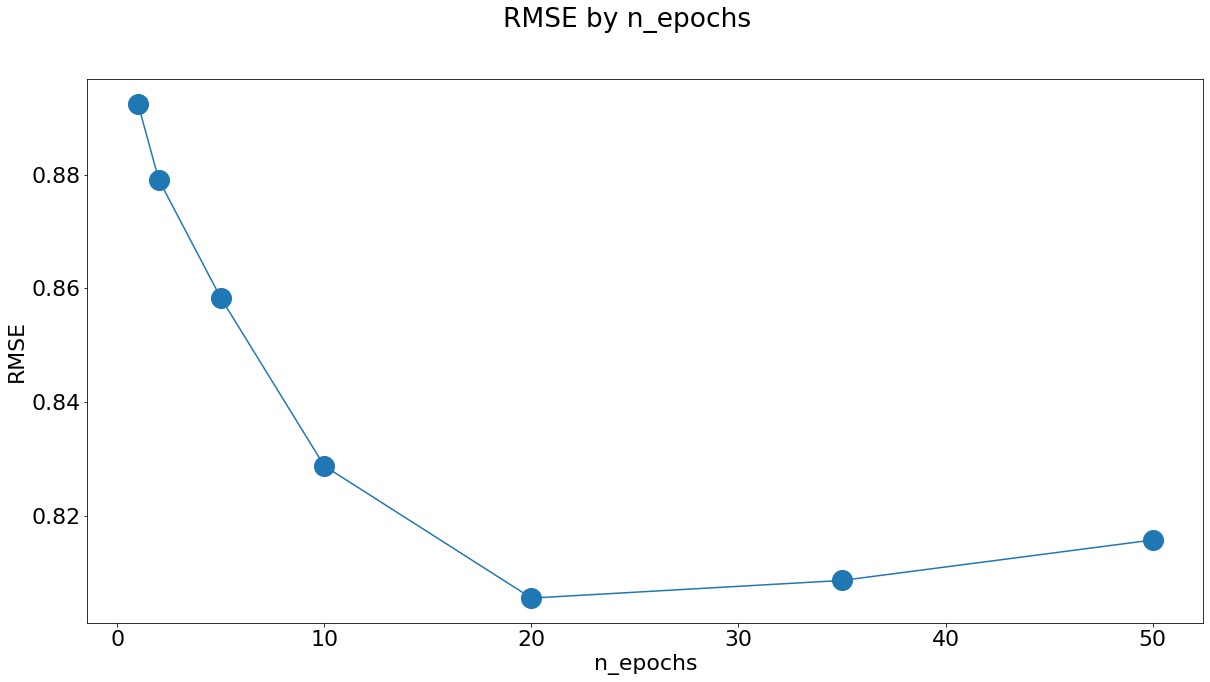

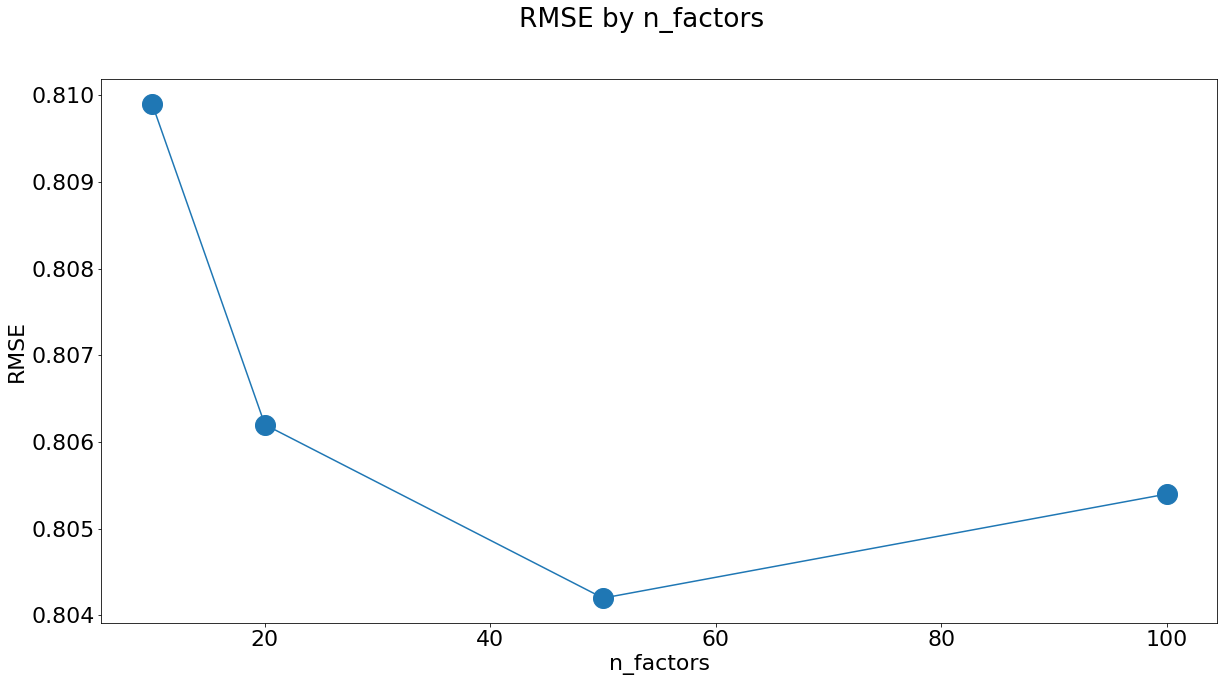

In [4]:
# Analyse results
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(20,10))

epochs = [1, 2, 5, 10, 20, 35, 50]
epochs_res = [0.8924, 0.8791, 0.8583, 0.8288, 0.8056, 0.8087, 0.8158]
fig.suptitle('RMSE by n_epochs')
plt.xlabel('n_epochs')
plt.ylabel('RMSE')
plt.plot(epochs, epochs_res, marker='o', markersize=20)
fig.savefig('hyperparams_epochs.png')

fig = plt.figure(figsize=(20,10))

factors = [10, 20, 50, 100]
factors_res = [0.8099, 0.8062, 0.8042, 0.8054]
fig.suptitle('RMSE by n_factors')
plt.xlabel('n_factors')
plt.ylabel('RMSE')
plt.plot(factors, factors_res, marker='o', markersize=20)
fig.savefig('hyperparams_factors.png')
